In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn
import nltk
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [20]:
# read the dataset
df=pd.read_csv("final.csv")

In [21]:
# showing first five rows
df.head()

Unnamed: 0                                              Title  \
0           0  House impeaches Trump for second time over Cap...   
1           1  I'm a 16 yr old blacksmith and I forged this w...   
2           2          Do some research before spouting nonsense   
3           3             Moving boxes arrive at the White House   
4           4  “No One Took Us Seriously”: Black Cops Warned ...   

   Upvote_ratio   Score  Gilded  Over_18  Number_of_Comments    neg    neu  \
0          0.72   39464       2    False                8801  0.292  0.708   
1          0.90   29423       0    False                 443  0.000  0.633   
2          0.90   50420       0    False                1008  0.351  0.649   
3          0.81  149858       6    False                4392  0.000  1.000   
4          0.98    7768       0    False                 157  0.319  0.681   

     pos  compound  
0  0.000   -0.5106  
1  0.367    0.8268  
2  0.000   -0.4019  
3  0.000    0.0000  
4  0.000   -0.7269

In [22]:
# drop the column Unnamed:0
df.drop(columns="Unnamed: 0",inplace=True)

In [23]:
df.head()

Title  Upvote_ratio   Score  \
0  House impeaches Trump for second time over Cap...          0.72   39464   
1  I'm a 16 yr old blacksmith and I forged this w...          0.90   29423   
2          Do some research before spouting nonsense          0.90   50420   
3             Moving boxes arrive at the White House          0.81  149858   
4  “No One Took Us Seriously”: Black Cops Warned ...          0.98    7768   

   Gilded  Over_18  Number_of_Comments    neg    neu    pos  compound  
0       2    False                8801  0.292  0.708  0.000   -0.5106  
1       0    False                 443  0.000  0.633  0.367    0.8268  
2       0    False                1008  0.351  0.649  0.000   -0.4019  
3       6    False                4392  0.000  1.000  0.000    0.0000  
4       0    False                 157  0.319  0.681  0.000   -0.7269

In [24]:
# check is there any null values
df.isna().sum()

Title                 0
Upvote_ratio          0
Score                 0
Gilded                0
Over_18               0
Number_of_Comments    0
neg                   0
neu                   0
pos                   0
compound              0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               7471 non-null   object 
 1   Upvote_ratio        7471 non-null   float64
 2   Score               7471 non-null   int64  
 3   Gilded              7471 non-null   int64  
 4   Over_18             7471 non-null   bool   
 5   Number_of_Comments  7471 non-null   int64  
 6   neg                 7471 non-null   float64
 7   neu                 7471 non-null   float64
 8   pos                 7471 non-null   float64
 9   compound            7471 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 532.7+ KB


In [26]:
# checking is there any duplicate record
df[df.duplicated()]

Title  Upvote_ratio  Score  Gilded  \
508                    My discus family.          0.99   1760       0   
527  Roses are red, butts are for eating          0.98  11304       0   

     Over_18  Number_of_Comments  neg  neu  pos  compound  
508    False                  66  0.0  1.0  0.0       0.0  
527    False                  43  0.0  1.0  0.0       0.0

In [27]:
# pandas profiling for analysis of entire dataframe
from pandas_profiling import ProfileReport
profile=ProfileReport(df,title="pandas profiling report")
profile

In [28]:
# find the correlation between diffrent numerical features
corr=df.corr()

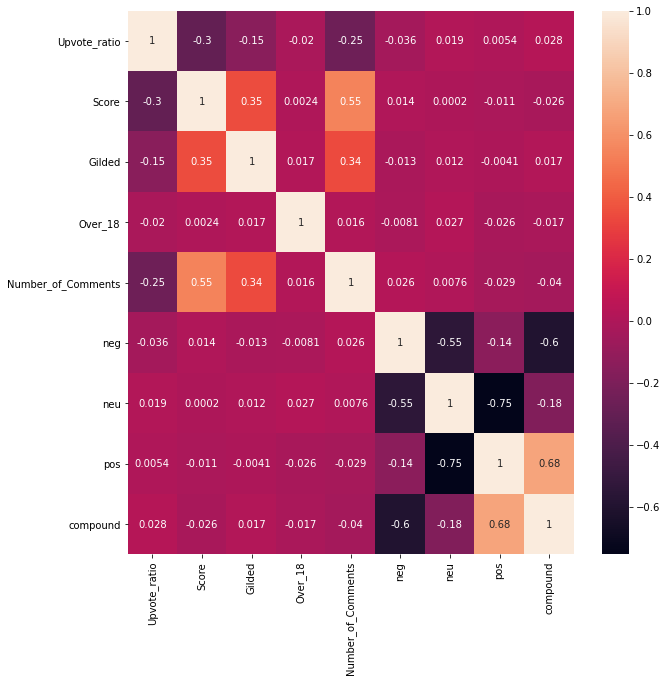

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.show()

In [30]:
x1=df.drop(columns=["Title"])

In [31]:
# getting feature value
features=x1.columns.values

In [32]:
features

array(['Upvote_ratio', 'Score', 'Gilded', 'Over_18', 'Number_of_Comments',
       'neg', 'neu', 'pos', 'compound'], dtype=object)

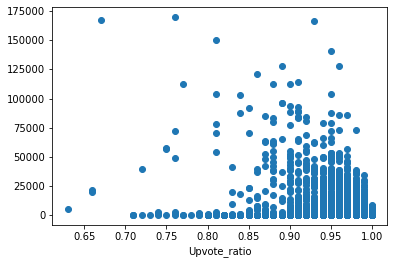

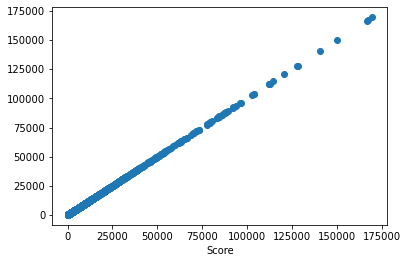

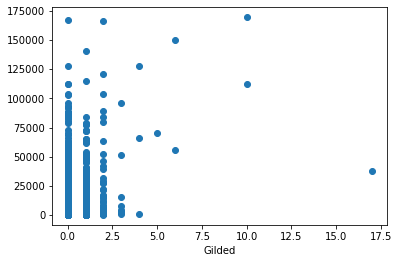

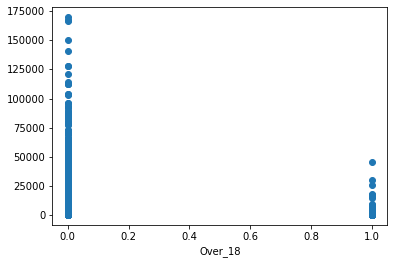

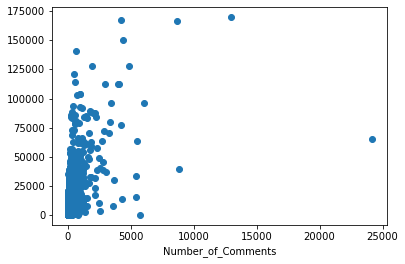

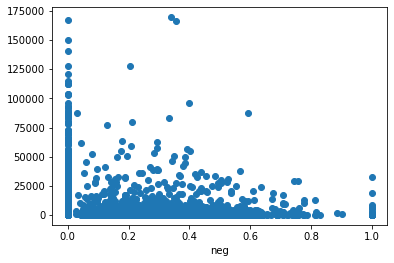

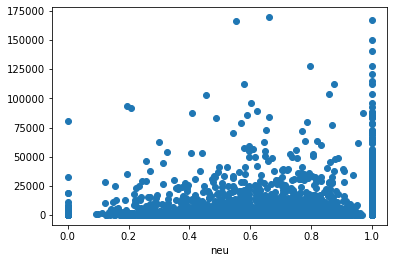

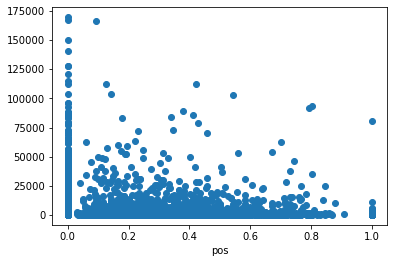

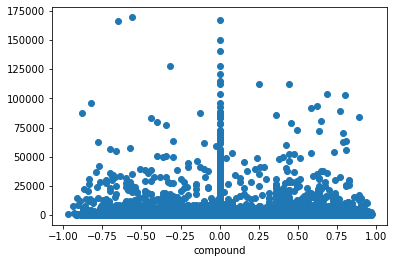

In [33]:
# scatter plot to determine the how the features and dependant variable ["Score"] related
for ftr in features:
    data=x1.copy()
    plt.scatter(data[ftr],data["Score"])
    plt.xlabel(ftr)
    plt.show()

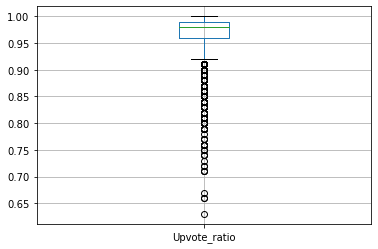

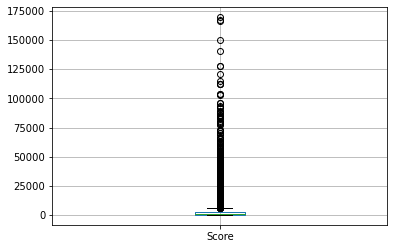

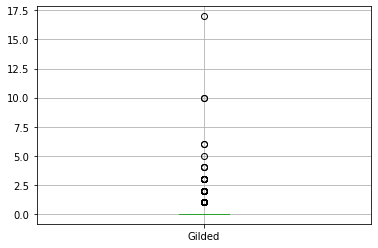

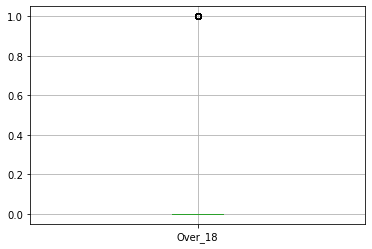

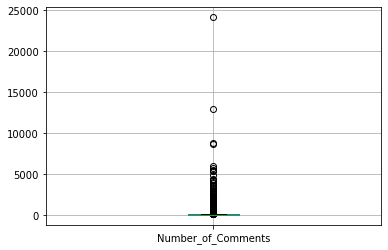

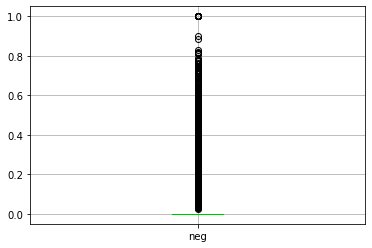

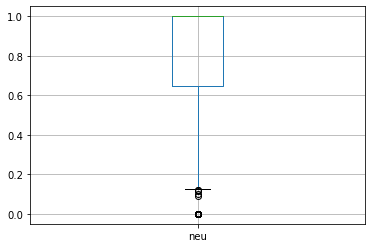

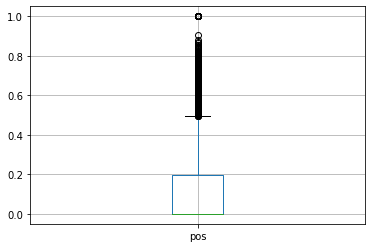

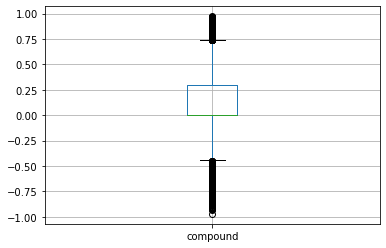

In [34]:
# boxplot to determine outlier in dataset
for ftrs in features:
    data=x1.copy()
    data.boxplot(ftrs)
    plt.show()

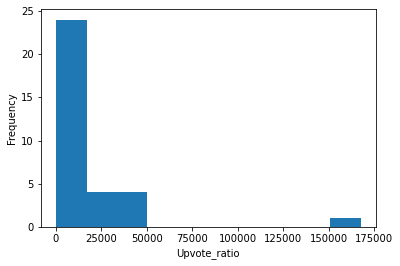

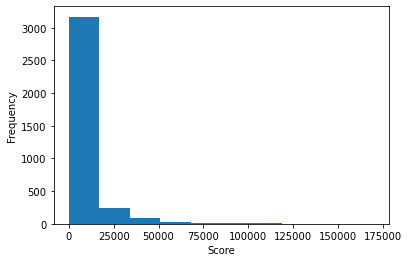

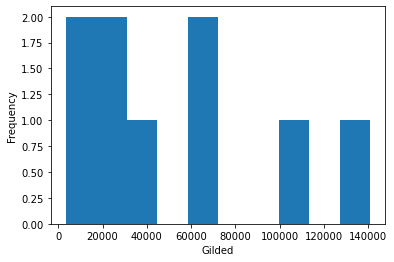

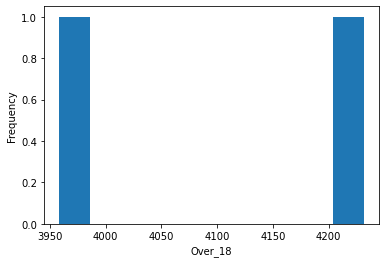

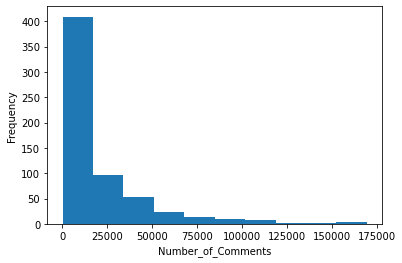

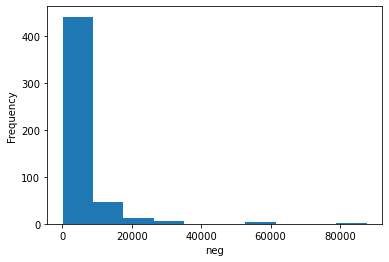

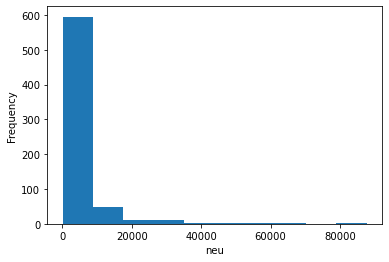

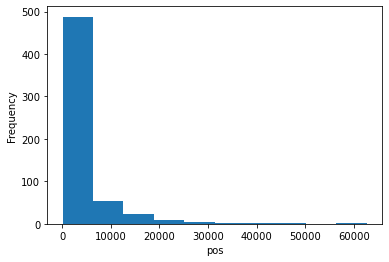

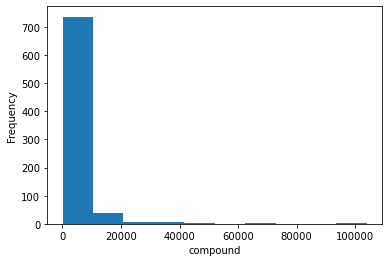

In [35]:
# how the data is distributed
for ftr in features:
    data=x1.copy()
    data.groupby(ftr)["Score"].mean().plot.hist()
    plt.xlabel(ftr)
    plt.show()

In [36]:
# since the data are note distributed normally
#x1["Upvote_ratio"]=np.log1p(x1["Upvote_ratio"])
# x1["Gilded"]=np.log1p(x1["Gilded"])
# x1["Number_of_Comments"]=np.log1p(x1["Number_of_Comments"])
# x1["neg"]=np.log1p(x1["neg"])
# x1["neu"]=np.log1p(x1["neu"])
# x1["pos"]=np.log1p(x1["pos"])
# x1["compound"]=np.log1p(x1["compound"])

In [37]:
# outlier removal
# min=x1.Number_of_Comments.mean()-3*x1.Number_of_Comments.std()
# max=x1.Number_of_Comments.mean()+3*x1.Number_of_Comments.std()
# x1=x1[(x1["Number_of_Comments"]>min) & (x1["Number_of_Comments"]<max)]
# min=x1.Gilded.mean()-3*x1.Gilded.std()
# max=x1.Gilded.mean()+3*x1.Gilded.std()
# x1=x1[(x1["Gilded"]>min) & (x1["Gilded"]<max)]
# min=x1.neg.mean()-3*x1.neg.std()
# max=x1.neg.mean()+3*x1.neg.std()
# x1=x1[(x1["neg"]>min) & (x1["neg"]<max)]
# min=x1.pos.mean()-3*x1.pos.std()
# max=x1.pos.mean()+3*x1.pos.std()
# x1=x1[(x1["pos"]>min) & (x1["pos"]<max)]
# min=x1.neu.mean()-3*x1.neu.std()
# max=x1.neu.mean()+3*x1.neu.std()
# x1=x1[(x1["neu"]>min) & (x1["neu"]<max)]
# min=x1.compound.mean()-3*x1.compound.std()
# max=x1.compound.mean()+3*x1.compound.std()
# x1=x1[(x1["compound"]>min) & (x1["compound"]<max)]

In [38]:
# independent variable
y=df["Score"]

In [39]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# import re

In [40]:
# # tokenization of words
# lemmatizer=WordNetLemmatizer()
# corpus=[]
# for i in range(len(df)):
#     sentence=re.sub("[^A-Za-z0-9]"," ",df["Title"][i])
#     sentence=sentence.lower()
#     sentence=sentence.split()
#     sentence=[lemmatizer.lemmatize(words) for words in sentence if words not in stopwords.words("english")]
#     sentence=" ".join(sentence)
#     corpus.append(sentence)

In [41]:
# corpus[6]

In [42]:
# # counter vectorizer for text to numerical representatin
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=5000,ngram_range=(1,4))
# text=cv.fit_transform(corpus).toarray()

In [43]:
# tfidf vector for word to numrical representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
text=tfidf.fit_transform(df["Title"]).toarray()

In [44]:
# first 20 features
tfidf.get_feature_names()[:20]

['00',
 '000',
 '000th',
 '0027',
 '004',
 '00jst',
 '01',
 '02',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '100ibs',
 '100k',
 '101',
 '102',
 '104']

In [45]:
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
# creating separate dataframe for tfidf vector data
x2=pd.DataFrame(text,columns=tfidf.get_feature_names())

In [47]:
x2.head()

00  000  000th  0027  004  00jst   01   02   06   07  ...   나로  바꾸자  𝐂𝐨𝐰  \
0  0.0  0.0    0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0    0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0    0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0    0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0    0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

   𝐚𝐧𝐝  𝐜𝐚𝐫𝐚𝐜𝐚𝐥  𝐟𝐫𝐨𝐠  𝐠𝐨𝐞𝐬  𝐭𝐡𝐞  𝒄𝒓𝒐𝒂𝒌  𝙢𝙤𝙤  
0  0.0      0.0   0.0   0.0  0.0    0.0  0.0  
1  0.0      0.0   0.0   0.0  0.0    0.0  0.0  
2  0.0      0.0   0.0   0.0  0.0    0.0  0.0  
3  0.0      0.0   0.0   0.0  0.0    0.0  0.0  
4  0.0      0.0   0.0   0.0  0.0    0.0  0.0  

[5 rows x 12722 columns]

In [48]:
x2.shape

(7471, 12722)

In [49]:
# drop the column Score and Title
x1=df.drop(columns=["Score","Title"])
x1.head()

Upvote_ratio  Gilded  Over_18  Number_of_Comments    neg    neu    pos  \
0          0.72       2    False                8801  0.292  0.708  0.000   
1          0.90       0    False                 443  0.000  0.633  0.367   
2          0.90       0    False                1008  0.351  0.649  0.000   
3          0.81       6    False                4392  0.000  1.000  0.000   
4          0.98       0    False                 157  0.319  0.681  0.000   

   compound  
0   -0.5106  
1    0.8268  
2   -0.4019  
3    0.0000  
4   -0.7269

In [50]:
# concatenating x1 and x2
finaldf=pd.concat([x1,x2],axis=1)

In [51]:
finaldf.head()

Upvote_ratio  Gilded  Over_18  Number_of_Comments    neg    neu    pos  \
0          0.72       2    False                8801  0.292  0.708  0.000   
1          0.90       0    False                 443  0.000  0.633  0.367   
2          0.90       0    False                1008  0.351  0.649  0.000   
3          0.81       6    False                4392  0.000  1.000  0.000   
4          0.98       0    False                 157  0.319  0.681  0.000   

   compound   00  000  ...   나로  바꾸자  𝐂𝐨𝐰  𝐚𝐧𝐝  𝐜𝐚𝐫𝐚𝐜𝐚𝐥  𝐟𝐫𝐨𝐠  𝐠𝐨𝐞𝐬  𝐭𝐡𝐞  \
0   -0.5106  0.0  0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
1    0.8268  0.0  0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
2   -0.4019  0.0  0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
3    0.0000  0.0  0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
4   -0.7269  0.0  0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   

   𝒄𝒓𝒐𝒂𝒌  𝙢𝙤𝙤  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0.0  
4    0.0  0.0  

[5 rows x 12730 columns]

In [52]:
finaldf.shape

(7471, 12730)

In [53]:
y.shape

(7471,)

In [54]:
# # standared scaler for standarding values and pca for diamensionality reduction
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# scaler = StandardScaler()
# x2new = scaler.fit_transform(finaldf)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1000)
# # prepare transform on dataset
# transformed=pca.fit_transform(x2new)



In [55]:
# spliting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(finaldf,y,test_size=.25,random_state=0)

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
modelExtraRegressor=ExtraTreesRegressor()
modelExtraRegressor.fit(x_train,y_train)

ExtraTreesRegressor()

In [57]:
modelExtraRegressor.score(x_test,y_test)
y_predict=modelExtraRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 2536.3835947537473
r2 score : 0.4796245614394936


In [58]:
from sklearn.ensemble import RandomForestRegressor
modelRandomRegressor=RandomForestRegressor()
modelRandomRegressor.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
modelRandomRegressor.score(x_test,y_test)
y_predict=modelRandomRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 2459.380760438972
r2 score : 0.5607930062980551


In [60]:
from sklearn.neighbors import KNeighborsRegressor
modelKNeighborsRegressor=KNeighborsRegressor()
modelKNeighborsRegressor.fit(x_train,y_train)

KNeighborsRegressor()

In [61]:
y_predict=modelKNeighborsRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 3092.536188436831
r2 score : 0.3530303239065373


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
modelCV=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=7,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [65]:
modelCV.fit(x_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mufseeramusthafa/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  5.7min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  8.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=7, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [66]:
predictionCV=modelCV.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,predictionCV))
print("r2 score :",r2_score(y_test,predictionCV))

MAE : 2637.7961804504193
r2 score : 0.5834413725079655


In [67]:
modelCV.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

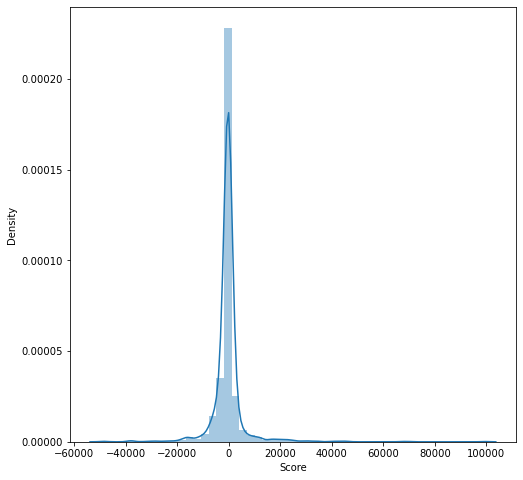

In [68]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-predictionCV)
plt.show()


In [69]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN=KNeighborsRegressor(n_neighbors=45)
modelKNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=45)

In [70]:
modelKNN.score(x_test,y_test)

0.529284099400901

In [77]:
from sklearn.ensemble import RandomForestRegressor
modelRandomRegressor=RandomForestRegressor(n_estimators=400,
min_samples_split=5,
min_samples_leaf=5,
max_features='auto',
max_depth=15)
modelRandomRegressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400)

In [78]:
modelRandomRegressor.score(x_test,y_test)
y_predict=modelRandomRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 2642.712462902594
r2 score : 0.5793125813507991
